In [32]:
#import libraries
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact

#define dates
start = "2015-12-28"
training_end = "2018-03-05"
treatment_start = "2018-03-12"
end = "2018-07-16"
end_stock = "2018-07-17"

In [24]:
#get stock data
stocks = ["META", "WMT", "DIS", "BMW.DE", "NVS",
          "GS", "GE", "KHC", "MCD", "CARL-B.CO"]
dataset = yf.download(stocks,
                      start = start,
                      end = end_stock,
                      interval = '1wk')

[*********************100%***********************]  10 of 10 completed


In [25]:
dataset

Adj Close                                                  \
               BMW.DE   CARL-B.CO         DIS          GE          GS   
Date                                                                    
2015-12-28  68.664032  523.957886   99.137016  215.470612  159.413040   
2016-01-04  58.684078  508.132233   93.636742  196.794159  145.004608   
2016-01-11  54.872143  454.667114   88.589325  197.070877  137.636703   
2016-01-18  56.060734  462.366089   91.419647  195.341537  138.742310   
2016-01-25  53.915653  494.445099   90.400726  201.290329  142.899490   
...               ...         ...         ...         ...         ...   
2018-06-25  61.966599  678.078308  101.928238  102.089920  201.896545   
2018-07-02  64.018051  703.339294  101.899063  103.890175  203.013229   
2018-07-06        NaN         NaN         NaN         NaN         NaN   
2018-07-09  63.555084  699.730591  107.835442  104.190231  207.242126   
2018-07-16  63.866394  706.045837  108.129547  102.690002  211.461838   

                                                                     \
                  KHC         MCD        META        NVS        WMT   
Date                                                                  
2015-12-28  55.038429   99.823013  104.660004  59.577049  53.194622   
2016-01-04  53.843266   97.575462   97.330002  56.474941  55.138451   
2016-01-11  52.345528   97.321953   94.970001  55.554005  53.741310   
2016-01-18  56.271412  100.042702   97.940002  56.945793  54.400822   
2016-01-25  59.047550  104.588562  112.209999  53.989101  57.585571   
...               ...         ...         ...        ...        ...   
2018-06-25  51.302685  141.774353  194.320007  58.385120  79.425407   
2018-07-02  52.617508  144.244446  203.229996  59.644947  78.368240   
2018-07-06        NaN         NaN         NaN        NaN        NaN   
2018-07-09  52.143845  143.421097  207.320007  60.889328  81.326424   
2018-07-16  51.490517  144.543030  209.990005  60.827496  81.780800   

                Close                                                  \
               BMW.DE   CARL-B.CO         DIS          GE          GS   
Date                                                                    
2015-12-28  97.629997  612.500000  105.080002  239.615387  180.229996   
2016-01-04  83.440002  594.000000   99.250000  218.846161  163.940002   
2016-01-11  78.019997  531.500000   93.900002  219.153839  155.610001   
2016-01-18  79.709999  540.500000   96.900002  217.230774  156.860001   
2016-01-25  76.660004  578.000000   95.820000  223.846161  161.559998   
...               ...         ...         ...         ...         ...   
2018-06-25  77.629997  751.599976  104.809998  104.692307  220.570007   
2018-07-02  80.199997  779.599976  104.779999  106.538460  221.789993   
2018-07-06        NaN         NaN         NaN         NaN         NaN   
2018-07-09  79.620003  775.599976  110.000000  106.846153  226.410004   
2018-07-16  80.010002  782.599976  110.300003  105.307693  231.020004   

                                                                     \
                  KHC         MCD        META        NVS        WMT   
Date                                                                  
2015-12-28  72.760002  118.139999  104.660004  77.096771  61.299999   
2016-01-04  71.180000  115.480003   97.330002  73.082436  63.540001   
2016-01-11  69.199997  115.180000   94.970001  71.890678  61.930000   
2016-01-18  74.389999  118.400002   97.940002  73.691757  62.689999   
2016-01-25  78.059998  123.779999  112.209999  69.865593  66.360001   
...               ...         ...         ...        ...        ...   
2018-06-25  62.820000  156.690002  194.320007  67.688171  85.650002   
2018-07-02  64.430000  159.419998  203.229996  69.148743  84.510002   
2018-07-06        NaN         NaN         NaN        NaN        NaN   
2018-07-09  63.849998  158.509995  207.320007  70.591400  87.699997   
2018-07-16  63.049999  159.750000  209.990005  7

In [26]:
#getting only the data we want
dataset = dataset.iloc[:, :10]

#getting rid of unneeded level
dataset.columns = dataset.columns.droplevel()

#getting rid of NAs
dataset = dataset.dropna()

<AxesSubplot:xlabel='Date'>

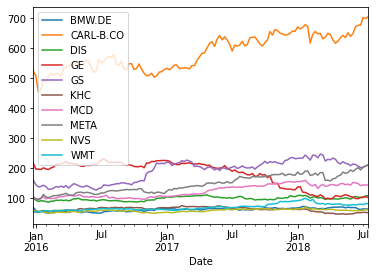

In [27]:
dataset.plot()

In [28]:
#Create dataset with training period only
dataset_cor = dataset[dataset.index <= treatment_start]

#correlation matrix

pd.set_option('display.max_columns', None)
dataset_cor.corr()

,BMW.DE,CARL-B.CO,DIS,GE,GS,KHC,MCD,META,NVS,WMT
BMW.DE,1.000000,0.677493,0.702099,-0.560315,0.900606,0.086082,0.733535,0.749997,0.541650,0.674949
CARL-B.CO,0.677493,1.000000,0.509493,-0.762227,0.661098,0.034457,0.931843,0.932952,0.867084,0.884714
DIS,0.702099,0.509493,1.000000,-0.318794,0.772599,0.336429,0.553775,0.546574,0.332149,0.471780
GE,-0.560315,-0.762227,-0.318794,1.000000,-0.603357,0.447606,-0.822315,-0.818774,-0.707410,-0.895724
GS,0.900606,0.661098,0.772599,-0.603357,1.000000,0.137826,0.751790,0.801838,0.492893,0.696490
KHC,0.086082,0.034457,0.336429,0.447606,0.137826,1.000000,-0.083728,0.026736,-0.035958,-0.128722
MCD,0.733535,0.931843,0.553775,-0.822315,0.751790,-0.083728,1.000000,0.946443,0.836783,0.896303
META,0.749997,0.932952,0.546574,-0.818774,0.801838,0.026736,0.946443,1.000000,0.828009,0.897989
NVS,0.541650,0.867084,0.332149,-0.707410,0.492893,-0.035958,0.836783,0.828009,1.000000,0.790410
WMT,0.674949,0.884714,0.471780,-0.895724,0.696490,-0.128722,0.896303,0.897989,0.790410,1.000000


In [29]:
#create dataset with the most correlated
final_series = dataset[["META", "CARL-B.CO", "GS", "MCD", "NVS", "WMT"]]

In [30]:
#create pre and post period
pre_period = [start, training_end]
post_period = [treatment_start, end]

In [33]:
impact = CausalImpact(data = final_series,
                      pre_period = pre_period,
                      post_period = post_period,
                      nseasons = [{'period': 52}],
                      priod_level_sd = None)

c:\Users\lapen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
c:\Users\lapen\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


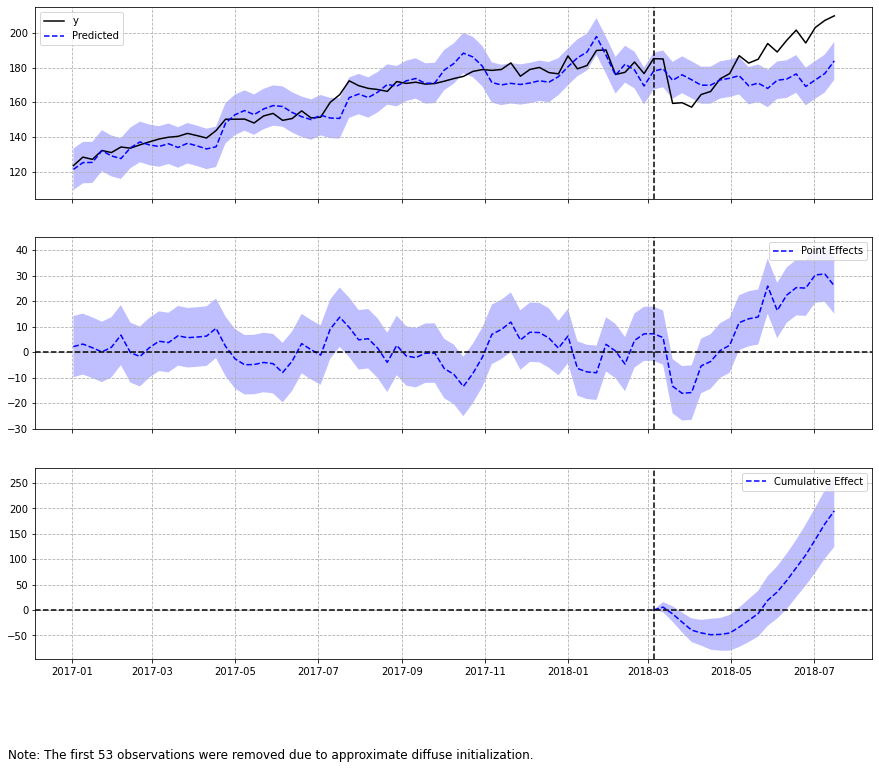

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    183.82             3492.6
Prediction (s.d.)         173.54 (1.87)      3297.23 (35.56)
95% CI                    [169.96, 177.3]    [3229.31, 3368.69]

Absolute effect (s.d.)    10.28 (1.87)       195.37 (35.56)
95% CI                    [6.52, 13.86]      [123.91, 263.29]

Relative effect (s.d.)    5.93% (1.08%)      5.93% (1.08%)
95% CI                    [3.76%, 7.99%]     [3.76%, 7.99%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 183.82. By contrast, in the absence of an
intervention, we would have expected an average response of 173.54.
The 95% interval of this counterfactual prediction is [169.96, 177.3].
Subtracting this prediction from 

In [34]:
#interpret the results
impact.plot()
print(impact.summary())
print(impact.summary('report'))